# PROJETO INTEGRADO

A **QuantumFinance** está acompanhando um crescimento de inadimplência entre seus clientes e solicita a consultoria para desenvolver uma análise com base na sua carteira atual de clientes.

Para que a **QuantumFinance** tome decisões mais precisas sobre concessões de crédito, ela precisa aprimorar seu modelo de crédito.

Com o objetivo de trazer novos clientes com o perfil de baixo risco de crédito desenvolva um modelo de Credit Scoring.

**Desafio:** Desenvolver o modelo preditivo mediante uso do valor target disponível na base de dados “Base_ScoreCredito_QuantumFinance.csv” e criar um simulador do modelo para os analistas de créditos e gerentes de conta.

In [48]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [46]:
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [3]:
# Caminho do arquivo CSV
arquivo = r'/content/Base_ScoreCredito_QuantumFinance.csv'

In [4]:
# Importar os dados para um DataFrame
df = pd.read_csv(arquivo, delimiter=';')

In [5]:
df

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,"40,089665024322",3,0,0,1,1,778
1,708083283,58,M,solteiro,ensino fundam,0,44,1,"66,557645274838",3,0,0,1,0,"276,3"
2,708084558,46,M,divorciado,doutorado,3,35,1,"123,68182089138",6,0,0,1,1,401
3,708085458,34,F,solteiro,mestrado,0,22,1,"19,7159343168329",6,0,0,1,0,"347,4"
4,708086958,49,F,casado,mestrado,2,36,0,0,3,1,437,1,2,476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,828288333,50,M,casado,mestrado,0,45,1,"100,128970755",4,0,0,1,0,470
10123,828291858,38,M,solteiro,ensino fundam,0,31,1,"89,80599574656",6,0,0,1,1,432
10124,828294933,49,F,casado,graduacao,3,43,1,"19,7993057098452",3,1,252,1,1,406
10125,828298908,54,M,casado,ensino medio,4,48,1,"194,78317642784",4,0,0,1,1,387


In [6]:
# Verificando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10127 non-null  int64 
 1   idade                10127 non-null  int64 
 2   sexo                 10127 non-null  object
 3   estado_civil         10127 non-null  object
 4   escola               10127 non-null  object
 5   Qte_dependentes      10127 non-null  int64 
 6   tempo_ultimoservico  10127 non-null  int64 
 7   trabalha             10127 non-null  int64 
 8   vl_salario_mil       10127 non-null  object
 9   reg_moradia          10127 non-null  int64 
 10  casa_propria         10127 non-null  int64 
 11  vl_imovel_em_mil     10127 non-null  int64 
 12  Qte_cartoes          10127 non-null  int64 
 13  Qte_carros           10127 non-null  int64 
 14  SCORE_CREDITO        10127 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


**Resumo:**

**Total de Linhas:** 10.127

**Total de Colunas:** 20

**Tipos de Dados:**

*   **int64:** 10 colunas
*   **float64:** 2 colunas
*   **bool:** 8 colunas


In [7]:
# Verificando nas colunas numericas dados gerais sobre valores minimos e máximos, quartis, desvio padrão e média
df.describe()

,id,idade,Qte_dependentes,tempo_ultimoservico,trabalha,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,1.547447,34.133208,0.911919,3.783450,0.352424,208.999111,1.083638,0.623383
std,3.690378e+07,8.016814,1.489079,8.221428,0.283427,1.580486,0.477749,378.495229,0.333784,0.569796
min,7.080821e+08,26.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.130368e+08,41.000000,0.000000,30.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000
50%,7.179264e+08,46.000000,1.000000,34.000000,1.000000,4.000000,0.000000,0.000000,1.000000,1.000000
75%,7.731435e+08,52.000000,3.000000,39.000000,1.000000,5.000000,1.000000,289.000000,1.000000,1.000000
max,8.283431e+08,73.000000,5.000000,57.000000,1.000000,6.000000,1.000000,1800.000000,4.000000,2.000000


**Resumo do Dataset:**

**Idade (média):** 46.33 anos

**Quantidade de Dependentes (média):** 1.55

**Tempo no Último Serviço (média):** 34.13 anos

**Percentual de Pessoas que Trabalham:** 91.19%

**Salário Médio (em mil):** 70.21

**Regiões de Moradia (mediana):** 4

**Percentual de Casas Próprias:** 35.24%

**Valor Médio do Imóvel (em mil):** 209.00

**Quantidade Média de Cartões:** 1.08

**Quantidade Média de Carros:** 0.62

**Score de Crédito Médio:** 469.50


**Estatísticas Detalhadas:**

**Idade:**  

*   Min: 26
*   Máx: 73


Quantidade de Dependentes:
* Min: 0
* Máx: 5

**Tempo no Último Serviço:**
* Min: 7
* Máx: 57

**Salário:**
* Min: 00
* Máx: 233.30 mil

**Valor do Imóvel:**
* Min: 0
* Máx: 1800 mil

**Score de Crédito:**
* Min: 162
* Máx: 979.65

In [8]:
# Converter valores numéricos com vírgula para ponto
for col in df.columns:
  if df[col].dtype == 'object':
# Verificar se a coluna é do tipo objeto (string)
    df[col] = df[col].str.replace(',', '.').astype(float, errors='ignore')

In [9]:
# Pré-processamento dos dados
# Convertendo variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, columns=['sexo', 'estado_civil', 'escola'], drop_first=True)

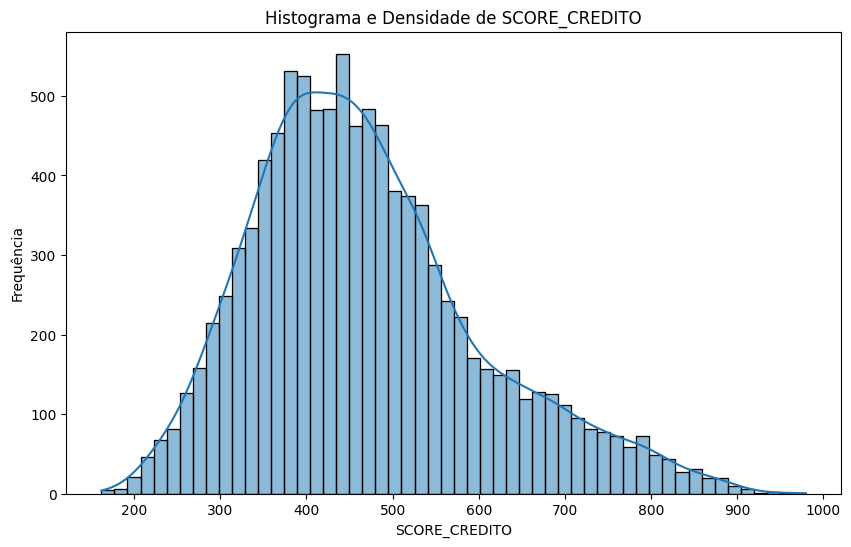

In [10]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['SCORE_CREDITO'], kde=True)
plt.title('Histograma e Densidade de SCORE_CREDITO')
plt.xlabel('SCORE_CREDITO')
plt.ylabel('Frequência')
plt.show()


O histograma mostra a distribuição de frequências do SCORE_CREDITO.

**Distribuição:** A maioria dos valores de SCORE_CREDITO está concentrada entre 300 e 700, com um pico em torno de 450.

**Assimetria:** A distribuição é assimétrica, com uma cauda mais longa à direita. Isso indica que há menos valores de SCORE_CREDITO mais altos.

**Curva de Densidade:** A curva de densidade sobreposta ao histograma ajuda a visualizar a forma da distribuição, confirmando a concentração de dados no intervalo mencionado.

# Verificando se a distribuição é normal

In [11]:
# Teste de Shapiro-Wilk
stat, p_value = stats.shapiro(df['SCORE_CREDITO'])

print(f'Statistic: {stat}')
print(f'p-value: {p_value}')

# Interpretação dos resultados
alpha = 0.05
if p_value > alpha:
    print('A amostra parece vir de uma distribuição normal (não rejeitar H0)')
else:
    print('A amostra não parece vir de uma distribuição normal (rejeitar H0)')


Statistic: 0.9658521372251754
p-value: 1.6116378599234149e-43
A amostra não parece vir de uma distribuição normal (rejeitar H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10127.
  res = hypotest_fun_out(*samples, **kwds)


Os resultados do teste de Shapiro-Wilk indicam que a amostra não segue uma distribuição normal.

**Statistic:** 0.9659

**p-value:** 1.6116e-43 (extremamente pequeno, indicando rejeição da hipótese nula H0)


**Transformação Logarítimica**

Abaixo vamos aplicar a transformação logarítmica na variável SCORE_CREDITO para aproximar sua distribuição a uma normal e, em seguida, plotar um histograma com a curva de densidade para visualizar essa nova distribuição.

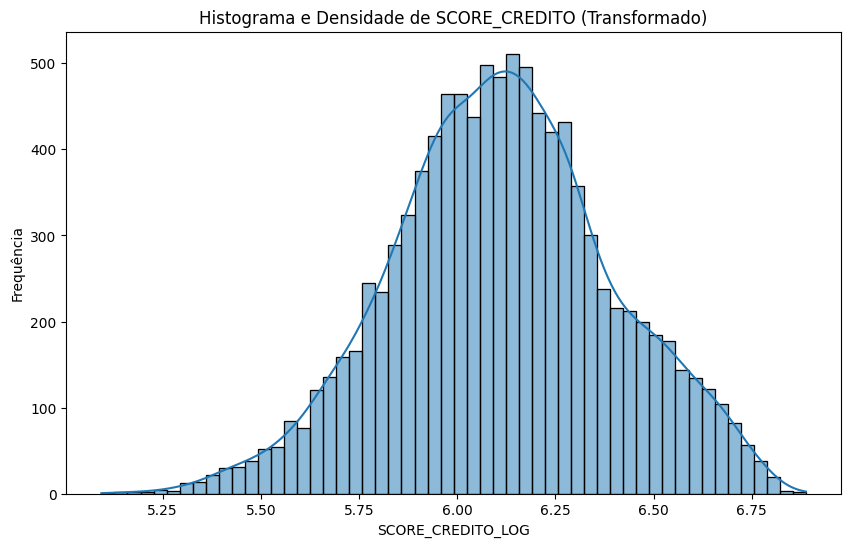

In [12]:
# Aplicar transformação logarítmica
df['SCORE_CREDITO_LOG'] = np.log(df['SCORE_CREDITO'] + 1)

# Plotar histograma e gráfico de densidade da variável transformada
plt.figure(figsize=(10, 6))
sns.histplot(df['SCORE_CREDITO_LOG'], kde=True)
plt.title('Histograma e Densidade de SCORE_CREDITO (Transformado)')
plt.xlabel('SCORE_CREDITO_LOG')
plt.ylabel('Frequência')
plt.show()

<Axes: xlabel='SCORE_CREDITO_LOG', ylabel='Count'>

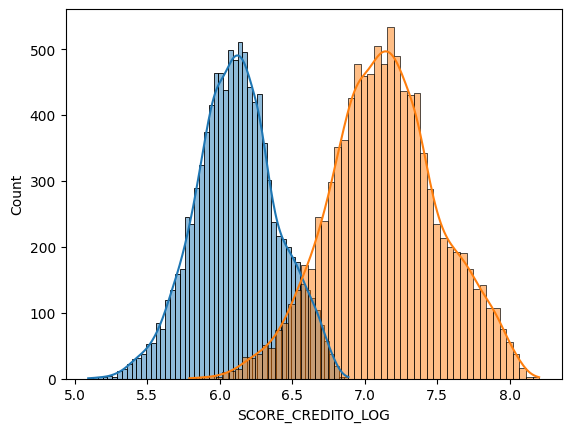

In [13]:
# Transformação Logarítmica
df['SCORE_CREDITO_LOG'] = np.log(df['SCORE_CREDITO'] + 1)
sns.histplot(df['SCORE_CREDITO_LOG'], kde=True)

# Transformação Box-Cox
from scipy import stats
df['SCORE_CREDITO_BOXCOX'], _ = stats.boxcox(df['SCORE_CREDITO'] + 1)
sns.histplot(df['SCORE_CREDITO_BOXCOX'], kde=True)


In [14]:
# Executar o teste de Shapiro-Wilk para SCORE_CREDITO_LOG
stat, p_value = stats.shapiro(df['SCORE_CREDITO_LOG'])

print(f'Statistic: {stat}')
print(f'p-value: {p_value}')

# Interpretação dos resultados
alpha = 0.05
if p_value > alpha:
    print('A amostra parece vir de uma distribuição normal (não rejeitar H0)')
else:
    print('A amostra não parece vir de uma distribuição normal (rejeitar H0)')


Statistic: 0.9973001312750654
p-value: 1.3970143764512171e-12
A amostra não parece vir de uma distribuição normal (rejeitar H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10127.
  res = hypotest_fun_out(*samples, **kwds)


In [15]:
from scipy import stats

# Executar o teste de Shapiro-Wilk para SCORE_CREDITO_BOXCOX
stat, p_value = stats.shapiro(df['SCORE_CREDITO_BOXCOX'])

print(f'Statistic: {stat}')
print(f'p-value: {p_value}')

# Interpretação dos resultados
alpha = 0.05
if p_value > alpha:
    print('A amostra parece vir de uma distribuição normal (não rejeitar H0)')
else:
    print('A amostra não parece vir de uma distribuição normal (rejeitar H0)')


Statistic: 0.9973242059996266
p-value: 1.6569372766983135e-12
A amostra não parece vir de uma distribuição normal (rejeitar H0)


In [16]:
df.drop(columns=['SCORE_CREDITO_BOXCOX', 'SCORE_CREDITO_LOG'], inplace= True)

# Aplicando normalização

In [17]:
# Criar um objeto MinMaxScaler
scaler = MinMaxScaler()

# Selecionar as colunas numéricas que serão normalizadas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Aplicar a normalização nas colunas numéricas
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



In [18]:
# Definir variáveis independentes (X) e dependente (y)
X = df.drop(['id', 'SCORE_CREDITO'], axis=1)
y = df['SCORE_CREDITO']

In [19]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
df

,id,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,sexo_M,estado_civil_divorciado,estado_civil_na,estado_civil_solteiro,escola_ensino fundam,escola_ensino medio,escola_graduacao,escola_mestrado
0,0.000000,0.404255,0.6,0.66,1.0,0.171836,0.4,0.0,0.000000,0.0,0.5,0.753379,False,False,False,False,False,False,True,False
1,0.000010,0.680851,0.0,0.74,1.0,0.285286,0.4,0.0,0.000000,0.0,0.0,0.139791,True,False,False,True,True,False,False,False
2,0.000021,0.425532,0.6,0.56,1.0,0.530137,1.0,0.0,0.000000,0.0,0.5,0.292301,True,True,False,False,False,False,False,False
3,0.000028,0.170213,0.0,0.30,1.0,0.084508,1.0,0.0,0.000000,0.0,0.0,0.226747,False,False,False,True,False,False,False,True
4,0.000041,0.489362,0.4,0.58,0.0,0.000000,0.4,1.0,0.242778,0.0,1.0,0.384027,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.999545,0.510638,0.0,0.76,1.0,0.429182,0.6,0.0,0.000000,0.0,0.0,0.376689,True,False,False,False,False,False,False,True
10123,0.999574,0.255319,0.0,0.48,1.0,0.384935,1.0,0.0,0.000000,0.0,0.5,0.330215,True,False,False,True,True,False,False,False
10124,0.999600,0.489362,0.6,0.72,1.0,0.084866,0.4,1.0,0.140000,0.0,0.5,0.298416,False,False,False,False,False,False,True,False
10125,0.999633,0.595745,0.8,0.82,1.0,0.834898,0.6,0.0,0.000000,0.0,0.5,0.275179,True,False,False,False,False,True,False,False


# Modelo de Regressão Linear

In [21]:
# Criar o modelo de Regressão Linear
model = LinearRegression()


In [22]:
# Treinar o modelo
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Fazer previsões
y_pred = model.predict(X_test)


In [24]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Mostrar coeficientes do modelo
print('Coeficientes do modelo:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')



Mean Squared Error: 0.009958737655512613
R2 Score: 0.6200483648985327
Coeficientes do modelo:
idade: -0.06947277016528836
Qte_dependentes: 0.026950302536817072
tempo_ultimoservico: 0.3517825064812316
trabalha: 0.051154439948695785
vl_salario_mil: 0.19714338179672442
reg_moradia: -0.04611050637097068
casa_propria: -0.12955141024332345
vl_imovel_em_mil: 0.49835733725939024
Qte_cartoes: 0.2531351775949681
Qte_carros: 0.14542884393354055
sexo_M: -0.02177277714057178
estado_civil_divorciado: 0.028139438181494444
estado_civil_na: 0.022802798996783273
estado_civil_solteiro: -0.002645322826208749
escola_ensino fundam: -0.014253956343809392
escola_ensino medio: 0.002792400776589521
escola_graduacao: 0.00205412281391434
escola_mestrado: 0.011758999157518336


**Resumo:**

**Mean Squared Error (MSE):** 0.00996

Indica um erro médio quadrático baixo, sugerindo previsões precisas.

**R² Score:** 0.6200

O modelo explica 62.00% da variabilidade dos dados de score de crédito, mostrando um bom ajuste.

**Coeficientes do Modelo:**

* **vl_imovel_em_mil:** 0.4984 (maior impacto positivo)
* **tempo_ultimoservico:** 0.3518
* **vl_salario_mil:** 0.1971
* **Qte_cartoes:** 0.2531
* **idade:** -0.0695 (impacto negativo)


# Testando a previsão com SVM

In [28]:
# Definir variáveis independentes (X) e dependente (y)
X = df.drop(['id', 'SCORE_CREDITO'], axis=1)
y = df['SCORE_CREDITO']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de Support Vector Regression
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 0.009810098623587858
R2 Score: 0.625719328947721


**Considerações:**

**Mean Squared Error (MSE):** 0.0098

Indica que o erro médio quadrático entre as previsões do modelo e os valores reais é baixo, sugerindo previsões precisas.

**R² Score: 0.6257**

O modelo explica aproximadamente 62.57% da variabilidade nos dados do score de crédito. Isso demonstra um bom ajuste, mas ainda há espaço para melhorias

# Testando arvore de decisão

In [26]:
# Definir variáveis independentes (X) e dependente (y)
X = df.drop(['id', 'SCORE_CREDITO'], axis=1)
y = df['SCORE_CREDITO']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de Árvore de Decisão
model = DecisionTreeRegressor(random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Exibir importância das features
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)
print('Importância das Features:')
print(feature_importances)

Mean Squared Error: 0.01032627064515975
R2 Score: 0.6060260294178043
Importância das Features:
                    feature  importance
7          vl_imovel_em_mil    0.354266
4            vl_salario_mil    0.286059
2       tempo_ultimoservico    0.122846
0                     idade    0.063004
9                Qte_carros    0.062031
8               Qte_cartoes    0.035678
1           Qte_dependentes    0.016347
5               reg_moradia    0.015473
13    estado_civil_solteiro    0.010896
16         escola_graduacao    0.005487
10                   sexo_M    0.005119
15      escola_ensino medio    0.004215
11  estado_civil_divorciado    0.003824
6              casa_propria    0.003729
14     escola_ensino fundam    0.003711
17          escola_mestrado    0.003496
12          estado_civil_na    0.002635
3                  trabalha    0.001182


**Resultado:**

**Mean Squared Error (MSE):** 0.0103

Indica que o erro médio quadrático entre as previsões do modelo e os valores reais é baixo, sugerindo previsões relativamente precisas.

**R² Score:** 0.6060

O modelo explica aproximadamente 60.60% da variabilidade nos dados do score de crédito, mostrando um bom ajuste, mas com espaço para melhoria.

**Importância das Features:**

**vl_imovel_em_mil:** 35.43% da importância total.

**vl_salario_mil:** 28.61%.

**tempo_ultimoservico:** 12.28%.

**idade:** 6.30%.

Outros fatores como quantidade de carros e cartões, número de dependentes, e diversas variáveis demográficas têm menor importância.


# Aplicando o GridSearchCV


GridSearchCV com DecisionTreeRegressor para realizar uma busca exaustiva pelos melhores hiperparâmetros do modelo de regressão de árvore de decisão. Isso ajuda a encontrar a combinação ideal de parâmetros que maximiza o desempenho do modelo.

In [27]:
# Definir os parâmetros a serem otimizados
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Criar o modelo de Árvore de Decisão
tree = DecisionTreeRegressor(random_state=42)

# Configurar a busca em grade com validação cruzada
grid = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid.fit(X_train, y_train)

# Imprimir os melhores parâmetros e a acurácia correspondente
print(f'Melhores Parâmetros: {grid.best_params_}')
print(f'Melhor Acurácia (MSE Negativo): {grid.best_score_}')

# Fazer previsões no conjunto de teste usando o melhor modelo encontrado
best_tree = grid.best_estimator_
y_pred = best_tree.predict(X_test)

# Avaliar o desempenho do modelo otimizado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Exibir importância das features
importances = best_tree.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)
print('Importância das Features:')
print(feature_importances)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20; total time=   0.

**Resumo da Aplicação do GridSearch**

Melhores Parâmetros:
* **max_depth:** 20
* **min_samples_leaf:** 10
* **min_samples_split:** 2

**Melhor Acurácia:**

**MSE Negativo:** -0.0078828

Indica que o erro médio quadrático nas previsões do modelo é muito baixo.

**Desempenho do Modelo:**

**Mean Squared Error (MSE):** 0.0085278

Indica previsões bastante precisas, com um erro médio quadrático baixo.

**R² Score:** 0.6746

O modelo explica aproximadamente 67.46% da variabilidade nos dados do score de crédito, demonstrando um bom ajuste.

**Importância das Features:**

* **vl_imovel_em_mil:** 41.26%
* **vl_salario_mil:** 28.58%
* **tempo_ultimoservico:** 11.97%
* **Qte_carros:** 7.08%
* **idade:** 3.79%

Outras features contribuem menos para o modelo, com importâncias menores.

**Conclusão:**

O GridSearch ajudou a otimizar os hiperparâmetros do modelo, resultando em um bom desempenho com um MSE baixo e um R² Score de 67.46%. As principais features identificadas foram vl_imovel_em_mil e vl_salario_mil, seguidas por tempo_ultimoservico.



---
# Avaliando Random Forest Regressor


In [29]:
# Definir variáveis independentes (X) e dependente (y)
X = df.drop(['id', 'SCORE_CREDITO'], axis=1)
y = df['SCORE_CREDITO']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Exibir importância das features
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)
print('Importância das Features:')
print(feature_importances)


Mean Squared Error: 0.005831602733601544
R2 Score: 0.7775092516200999
Importância das Features:
                    feature  importance
7          vl_imovel_em_mil    0.356047
4            vl_salario_mil    0.277155
2       tempo_ultimoservico    0.123377
9                Qte_carros    0.062881
0                     idade    0.060580
8               Qte_cartoes    0.038137
1           Qte_dependentes    0.017819
5               reg_moradia    0.016923
13    estado_civil_solteiro    0.010666
15      escola_ensino medio    0.005359
10                   sexo_M    0.005158
16         escola_graduacao    0.005018
17          escola_mestrado    0.004821
14     escola_ensino fundam    0.004766
11  estado_civil_divorciado    0.003836
12          estado_civil_na    0.003526
6              casa_propria    0.002964
3                  trabalha    0.000968


**Resumo:**

**Mean Squared Error (MSE):** 0.00583

O erro médio quadrático é baixo, indicando previsões muito precisas.

**R² Score:** 0.7775

O modelo explica 77.75% da variabilidade nos dados de score de crédito, demonstrando um bom ajuste.

**Importância das Features:**

* **vl_imovel_em_mil:** 35.60% (maior impacto positivo)
* **vl_salario_mil:** 27.72%
* **tempo_ultimoservico:** 12.34%
* **Qte_carros:** 6.29%
* **idade:** 6.06%

Outras variáveis têm impacto menor, mas ainda contribuem para o modelo, como Qte_cartoes e Qte_dependentes.

Esses resultados mostram que vl_imovel_em_mil, vl_salario_mil e tempo_ultimoservico são os principais fatores que influenciam o score de crédito

# Aplicando Learning Curves

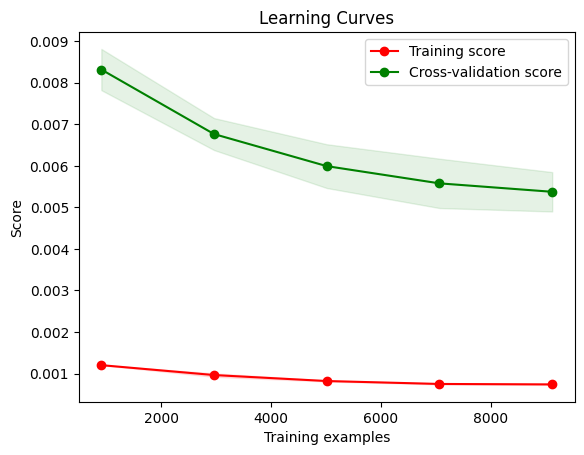

In [30]:

# Gerar curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring='neg_mean_squared_error')

# Calcular a média e o desvio padrão dos scores de treinamento e teste
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = -train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = -test_scores.std(axis=1)

# Plotar as curvas de aprendizado
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()


**Avaliação das Curvas de Aprendizado**

As learning curves fornecem insights valiosos sobre o desempenho do modelo de Random Forest Regressor à medida que a quantidade de dados de treinamento aumenta. Aqui está uma análise baseada na imagem fornecida:

**Curva Vermelha (Training Score):**
Representa a pontuação de treinamento, começando em aproximadamente 0.001 e permanecendo quase constante.

**Curva Verde (Cross-Validation Score):** Representa a pontuação de validação cruzada, começando em cerca de 0.008 e diminuindo gradualmente à medida que o número de exemplos de treinamento aumenta.

O eixo x representa o número de exemplos de treinamento (0 a 10.000) e o eixo y mostra a pontuação (0 a 0.009). A área sombreada ao redor da curva de validação cruzada indica a variabilidade ou incerteza da pontuação.

**Conclusão:**

o modelo Random Forest Regressor está se comportando bem à medida que a quantidade de dados de treinamento aumenta. As curvas de aprendizado indicam que o modelo melhora sua capacidade de generalização e precisão com mais dados. Isso é evidenciado pela redução do erro de validação e pela aproximação da pontuação de validação à pontuação de treinamento, sugerindo que o modelo não está superajustando (overfitting) e está aprendendo padrões relevantes dos dados de forma eficaz.

In [31]:
from sklearn.model_selection import cross_val_score

# Usar validação cruzada com 10 folds
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

# Obter a média e o desvio padrão dos erros quadráticos médios
mse_scores = -scores  # MSE é negativo no scikit-learn, por isso multiplicamos por -1
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f'Mean MSE: {mean_mse}')
print(f'Std MSE: {std_mse}')


Mean MSE: 0.005376120436667809
Std MSE: 0.00047257971687221967



**Resultados da Validação Cruzada**

Os resultados da validação cruzada para o Random Forest Regressor mostram:

* **Mean MSE:** 0.0054

Um erro médio quadrático muito baixo, indicando previsões altamente precisas.

* **Std MSE:** 0.00047

Um desvio padrão muito pequeno, mostrando que o modelo é consistente e tem desempenho estável em diferentes divisões dos dados.

**Resumo:**
Esses resultados indicam que o modelo de Random Forest Regressor generaliza bem e não está superajustado (overfitting). O erro médio quadrático médio é baixo e consistente, mostrando que o modelo tem um bom desempenho em diferentes partes do conjunto de dados. A estabilidade do erro reforça a confiabilidade do modelo em produzir previsões precisas e robustas, independentemente da divisão dos dados de treinamento e teste.

# Criando um simulador para testar

In [33]:
# Salvar o modelo treinado em um arquivo
with open('random_forest_regressor.pkl', 'wb') as f: pickle.dump(model, f)

In [ ]:
# Carregar o modelo treinado
with open('random_forest_regressor.pkl', 'rb') as f:
    model = pickle.load(f)

In [49]:
# Obter as colunas esperadas a partir do DataFrame de treinamento original
expected_columns = X.columns.tolist()

# Função para simular uma previsão
def prever_score_credito(novos_dados):
    df_novos_dados = pd.DataFrame([novos_dados])
    df_novos_dados = pd.get_dummies(df_novos_dados, drop_first=True)

    # Adicionar colunas faltantes com valor zero
    for col in expected_columns:
        if col not in df_novos_dados.columns:
            df_novos_dados[col] = 0
    # Reordenar as colunas para corresponder ao treinamento
    df_novos_dados = df_novos_dados[expected_columns]

    previsao = model.predict(df_novos_dados)
    return previsao[0]

In [50]:
# SIMULANDO PREVISÃO
novos_dados = {
    'idade': 35,
    'Qte_dependentes': 2,
    'tempo_ultimoservico': 10,
    'trabalha': 1,
    'vl_salario_mil': 45,
    'reg_moradia': 3,
    'casa_propria': 0,
    'vl_imovel_em_mil': 300,
    'Qte_cartoes': 2,
    'Qte_carros': 1,
    'sexo_M': 1,
    'estado_civil_solteiro': 0,
    'estado_civil_divorciado': 0,
    'estado_civil_na': 0,
    'escola_graduacao': 0,
    'escola_mestrado': 1,
    'escola_ensino medio': 0,
    'escola_ensino fundam': 0
}

# Realizar a previsão
previsao = prever_score_credito(novos_dados)
print(f'Previsão do Score de Crédito: {previsao}')


Previsão do Score de Crédito: 0.8270970464135025
